IMPORT LIBRARIES

In [1]:
#mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
from cellpose import models
from cellpose import plot

import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from tifffile import imwrite
from PIL import Image
import tkinter as tk
from tkinter import filedialog
import skimage.io
time.sleep(0.5)
from matplotlib.pyplot import figure
import timeit

global MM, MM_ag, AA, AA_ag, time, time_step

FUNCTION TO EXPORT / SAVE RESULTS

In [2]:
def save_output(title):
    np.save(title+'capsule_growth_area_wall', AA)
    np.save(title+'capsule_growth_area_cells', AA_ag)
    np.save(title+'time_vector', time_vector)
    np.save(title+'time_step', time_step)
    imwrite(title+'capsule_growth_masks_wall',MM)
    imwrite(title+'capsule_growth_masks_cells',MM_ag)

    


SELECT FILE and DISPLAY FIRST IMAGE

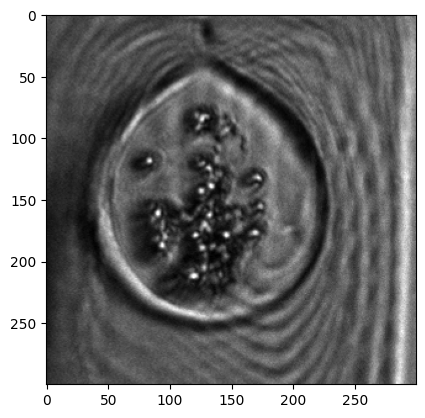

In [3]:
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()

stack = skimage.io.imread(file_path)
plt.imshow(stack[0,:,:], cmap='gray')
stack_BF=stack

directory_to_save=os.path.dirname(file_path)
os.chdir(directory_to_save)

CHECK THE FILE NAME IN THE FOLDER

In [5]:
import os,glob
folder_path = directory_to_save
for filename in glob.glob(os.path.join(folder_path, '*.tif')):
      print(filename)

E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_0.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_1.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_10.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_11.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_12.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_13.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_14.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_15.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_16.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_17.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_18.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_19.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\BF_mur_epais_2.tif
E:/Incubascope_cellpose/293T_NLS_tomato_2cdt_process\B

RUN OVER THE LOOP

BF_mur_epais_0.tif


C:\Users\Amaury\miniconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Amaury\miniconda3\envs\cellpose\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


BF_mur_epais_1.tif
BF_mur_epais_10.tif
BF_mur_epais_11.tif
BF_mur_epais_12.tif
BF_mur_epais_13.tif
BF_mur_epais_14.tif
BF_mur_epais_15.tif
BF_mur_epais_16.tif
BF_mur_epais_17.tif
BF_mur_epais_18.tif
BF_mur_epais_19.tif
BF_mur_epais_2.tif
BF_mur_epais_20.tif
BF_mur_epais_21.tif
BF_mur_epais_22.tif
BF_mur_epais_23.tif
BF_mur_epais_24.tif
BF_mur_epais_25.tif
BF_mur_epais_26.tif
BF_mur_epais_27.tif
BF_mur_epais_28.tif
BF_mur_epais_29.tif
BF_mur_epais_3.tif
BF_mur_epais_30.tif
BF_mur_epais_31.tif
BF_mur_epais_32.tif
BF_mur_epais_33.tif
BF_mur_epais_34.tif
BF_mur_epais_35.tif
BF_mur_epais_36.tif
BF_mur_epais_4.tif
BF_mur_epais_5.tif
BF_mur_epais_6.tif
BF_mur_epais_7.tif
BF_mur_epais_8.tif
BF_mur_epais_9.tif
BF_mur_fin_0.tif
BF_mur_fin_1.tif
BF_mur_fin_10.tif
BF_mur_fin_11.tif
BF_mur_fin_12.tif
BF_mur_fin_13.tif
BF_mur_fin_14.tif
BF_mur_fin_15.tif
BF_mur_fin_16.tif
BF_mur_fin_17.tif
BF_mur_fin_18.tif
BF_mur_fin_19.tif
BF_mur_fin_2.tif
BF_mur_fin_20.tif
BF_mur_fin_21.tif
BF_mur_fin_22.tif
BF_m

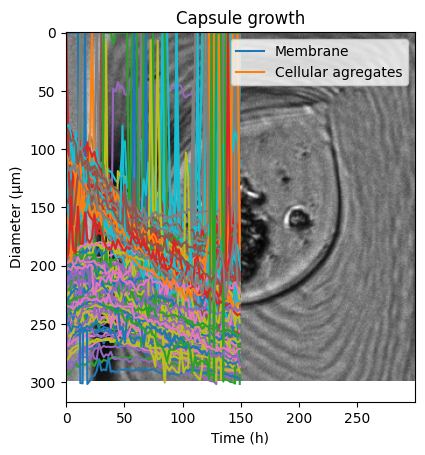

In [6]:
for file in os.listdir(folder_path):
    if file.endswith(".tif"):        
        title=os.path.splitext(file)[0]
        title0=file
        print(title0)
        stack = skimage.io.imread(file)
        plt.imshow(stack[0,:,:], cmap='gray')
        stack_BF=stack
        
        time_step=2

        n=np.shape(stack_BF)
        MM=np.zeros([n[0], n[1],n[2]],dtype=np.uint8)

        AA=np.zeros(n[0])
        DD=np.zeros(n[0])
        dd=80
        for ii in range(0,n[0],time_step):
            data=2**16-stack_BF[ii,:,:];
            model = models.Cellpose(gpu=False, model_type='cyto')
            channels = [0,0] # IF YOU HAVE GRAYSCALE
            masks, flows, styles, diams = model.eval(data, diameter=120, channels=channels)
            perimeters = utils.get_mask_perimeters(masks)
            npoints = np.unique(masks, return_counts=True)[1][1:]
            areas = npoints
            DIAM=utils.diameters(masks)
            dd=DIAM[1];
            if areas.size==0:
                Area=0
                dd=0
            else:
                Area=areas[0]
                dd=dd[0]
            AA[ii]=Area;    
            DD[ii]=dd*1.59;
            MM[ii,:,:]=masks.astype(np.uint8);

        n=np.shape(stack_BF)
        np.sqrt(np.sum(MM))
        MM_ag=np.zeros([n[0], n[1],n[2]],dtype=np.uint8)

        AA_ag=np.zeros(n[0])
        DD_ag=np.zeros(n[0])

        estimation_diameter=np.linspace(40,120,n[0])

        for ii in range(0,n[0],time_step):
            data=2**16-stack_BF[ii,:,:];
            model = models.Cellpose(gpu=False, model_type='nuclei')
            channels = [0,0] # IF YOU HAVE GRAYSCALE
            masks, flows, styles, diams = model.eval(data, diameter=60, channels=channels)
            perimeters = utils.get_mask_perimeters(masks)
            npoints = np.unique(masks, return_counts=True)[1][1:]
            areas = npoints
            DIAM=utils.diameters(masks)
            dd=DIAM[1];
            if areas.size==0:
                Area=0
                dd=0
            else:
                Area=np.sum(np.array(areas))
                dd=dd[0]
            AA_ag[ii]=Area; 
            DD_ag[ii]=dd*1.59;
            MM_ag[ii,:,:]=masks.astype(np.uint8)

        time_vector=np.linspace(0,n[0],n[0])
        plt.plot(time_vector[0:n[0]:time_step],1.59*np.sqrt(AA[0:n[0]:time_step]))
        plt.plot(time_vector[0:n[0]:time_step],1.59*np.sqrt(AA_ag[0:n[0]:time_step]))
        plt.title('Capsule growth')
        plt.legend(['Membrane','Cellular agregates'])
        plt.xlabel('Time (h)')
        plt.ylabel('Diameter (µm)')
        plt.savefig('diameters.png')

        save_output(title)